# 📊 Olist E-Ticaret Veri Analizi ve Müşteri Davranış Modellemesi

**Kullanılan Teknolojiler:** Python, Pandas, Matplotlib/Seaborn, Scipy (İstatistiksel Testler)

---

### 🎯 Projenin Amacı ve İş Problemi
Bu analiz, Brezilya'nın en büyük e-ticaret platformlarından Olist'in veri seti kullanılarak müşteri memnuniyetini etkileyen faktörleri belirlemek ve operasyonel verimliliği artıracak içgörüler sunmak amacıyla hazırlanmıştır.

### 🔍 Temel Odak Noktaları
1.  **Lojistik Analizi:** Teslimat sürelerinin müşteri puanlaması (Review Score) üzerindeki istatistiksel etkisi.
2.  **Ödeme Davranışları:** Farklı ödeme yöntemlerinin sipariş tutarlarıyla ilişkisi.
3.  **Kategori Analizi:** En çok satan ürün grupları ve fiyat stratejilerinin ANOVA testi ile doğrulanması.
4.  **İptal Analizi:** Sipariş iptallerinin kök nedenleri ve ödeme tipleriyle olan korelasyonu (Ki-Kare Testi).

## 1. Kütüphanelerin Yüklenmesi

Analiz boyunca aşağıdaki Python kütüphanelerini kullanıyoruz:

- **pandas** ve **numpy**: Veri okuma, düzenleme ve temel istatistiksel hesaplamalar
- **matplotlib** ve **seaborn**: Klasik grafikler (histogram, boxplot vb.)
- **plotly.express** ve **plotly.graph_objects**: Etkileşimli grafikler
- **scipy.stats**: İstatistiksel testler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns

## 2. Veri Setlerinin Yüklenmesi

Olist veri seti birden fazla tablo içeriyor. Bu çalışmada şu dosyaları kullanıyoruz:

In [ ]:
orders_data=pd.read_csv('/content/olist_orders_dataset.csv')
payment_data=pd.read_csv('/content/olist_order_payments_dataset.csv')
review_data=pd.read_csv('/content/olist_order_reviews_dataset.csv')
items_data=pd.read_csv('/content/olist_order_items_dataset.csv')
product_data=pd.read_csv('/content/olist_products_dataset.csv')
customers_data=pd.read_csv('/content/olist_customers_dataset.csv')
sellers_data=pd.read_csv('/content/olist_sellers_dataset.csv')

## 3. Ürün Kategorilerinin İngilizceye Çevrilmesi

Ürün kategorileri veri setinde Portekizce olarak yer alıyor. Analizi ve görselleştirmeleri daha anlaşılır kılmak için, kategorileri İngilizce
karşılıklarına çeviren bir sözlük oluşturduk ve bunu ürün tablosuna uyguladık.


In [ ]:
ceviri = {
    "utilidades_domesticas": "Housewares",
    "unknown": "Unknown",
    "telefonia_fixa": "Fixed Telephony",
    "telefonia": "Telephony / Communication",
    "tablets_impressao_imagem": "Tablets, Printing & Imaging",
    "sinalizacao_e_seguranca": "Signaling & Security",
    "seguros_e_servicos": "Insurance & Services",
    "relogios_presentes": "Watches & Gifts",
    "portateis_cozinha_e_preparadores_de_alimentos": "Kitchen Portable Appliances & Food Prep",
    "portateis_casa_forno_e_cafe": "Small Home Appliances (Oven/Coffee)",
    "pet_shop": "Pet Shop",
    "perfumaria": "Perfumery",
    "pcs": "Computers (PCs)",
    "pc_gamer": "PC Gamer",
    "papelaria": "Stationery",
    "musica": "Music",
    "moveis_sala": "Living Room Furniture",
    "moveis_quarto": "Bedroom Furniture",
    "moveis_escritorio": "Office Furniture",
    "moveis_decoracao": "Furniture & Decor",
    "moveis_cozinha_area_de_servico_jantar_e_jardim": "Kitchen, Laundry, Dining & Garden Furniture",
    "moveis_colchao_e_estofado": "Furniture, Mattress & Upholstery",
    "market_place": "Marketplace",
    "malas_acessorios": "Luggage & Accessories",
    "livros_tecnicos": "Technical Books",
    "livros_interesse_geral": "General Interest Books",
    "livros_importados": "Imported Books",
    "la_cuisine": "Cuisine (French)",
    "instrumentos_musicais": "Musical Instruments",
    "informatica_acessorios": "Computer Accessories",
    "industria_comercio_e_negocios": "Industry, Commerce & Business",
    "fraldas_higiene": "Diapers & Hygiene",
    "flores": "Flowers",
    "ferramentas_jardim": "Tools & Garden",
    "fashion_underwear_e_moda_praia": "Underwear & Beachwear Fashion",
    "fashion_roupa_masculina": "Men's Clothing",
    "fashion_roupa_infanto_juvenil": "Children's/Teen's Clothing",
    "fashion_roupa_feminina": "Women's Clothing",
    "fashion_esporte": "Sports Fashion",
    "fashion_calcados": "Footwear",
    "fashion_bolsas_e_acessorios": "Bags & Accessories",
    "esporte_lazer": "Sports & Leisure",
    "eletroportateis": "Small Appliances",
    "eletronicos": "Electronics",
    "eletrodomesticos_2": "Home Appliances (Extended)",
    "eletrodomesticos": "Home Appliances",
    "dvds_blu_ray": "DVDs & Blu-Ray",
    "cool_stuff": "Cool Stuff",
    "construcao_ferramentas_seguranca": "Construction Tools & Security",
    "construcao_ferramentas_jardim": "Construction Tools & Garden",
    "construcao_ferramentas_iluminacao": "Construction Tools & Lighting",
    "construcao_ferramentas_ferramentas": "Construction Tools (General)",
    "construcao_ferramentas_construcao": "Construction Tools & Building",
    "consoles_games": "Consoles & Games",
    "climatizacao": "Air Conditioning",
    "cine_foto": "Cinema & Photo",
    "cds_dvds_musicais": "CDs & DVDs Musical",
    "casa_construcao": "Home & Construction",
    "casa_conforto_2": "Home Comfort 2",
    "casa_conforto": "Home Comfort",
    "cama_mesa_banho": "Bed, Bath & Table (Home Textile)",
    "brinquedos": "Toys",
    "beleza_saude": "Beauty & Health",
    "bebidas": "Beverages",
    "bebes": "Baby Items",
    "automotivo": "Automotive",
    "audio": "Audio",
    "artigos_de_natal": "Christmas Items",
    "artigos_de_festas": "Party Items",
    "artes_e_artesanato": "Arts & Crafts",
    "artes": "Arts",
    "alimentos_bebidas": "Food & Beverages",
    "alimentos": "Food",
    "agro_industria_e_comercio": "Agro Industry & Commerce"
}

## 4. Orders Tablosunun Yapısal İncelenmesi

Bu adımda, sipariş bilgilerini içeren **`orders_data`** tablosunun yapısını ve eksik veri durumunu inceledik.

Önce `orders_data.info()` çıktısı ile:
- Tablo boyutunu (99.441 satır, 8 sütun),
- Sütun adlarını ve veri tiplerini,
- Her sütundaki dolu (Non-Null) kayıt sayısını gördük.


In [ ]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ardından `orders_data.isna().sum()` ile her sütunda kaç tane **eksik değer** olduğunu hesapladık. Sonuçlara göre:
- `order_id`, `customer_id`, `order_status` ve `order_purchase_timestamp` sütunlarında eksik kayıt yok.
- `order_approved_at` sütununda **160**,  
- `order_delivered_carrier_date` sütununda **1.783**  
adet eksik değer bulundu (benzer şekilde teslim tarihindeki eksikler de gözlendi).

Bu analiz sayesinde:
- Hangi tarih alanlarında eksik veri olduğunu,
- İleride teslimat süresi ve lojistik analizleri yaparken hangi satırların filtrelenmesi veya dikkatle ele alınması gerektiğini

netleştirmiş olduk.

In [ ]:
orders_data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


## 5. Orders Tablosunda Tarih Alanlarının Dönüştürülmesi

Teslimat ve sipariş zamanlarını doğru analiz edebilmek için, `orders_data` tablosundaki tüm tarih alanlarını
metin (object) tipinden gerçek tarih-saat tipine (`datetime`) dönüştürdük.

Bu sayede:
- Sipariş ile teslimat arasındaki gün farkını hesaplayabiliyoruz,
- Belirli tarih aralıklarına göre filtreleme yapabiliyoruz,
- Zaman serisi grafikleri ve teslimat süresi analizleri için veri uygun forma gelmiş oluyor.

In [ ]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_cols:
    orders_data[col] = pd.to_datetime(orders_data[col])

In [ ]:
payment_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payment_data.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
review_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
review_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
review_data.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
review_data['review_creation_date'] = pd.to_datetime(review_data['review_creation_date'])
review_data['review_answer_timestamp'] = pd.to_datetime(review_data['review_answer_timestamp'])


In [ ]:
items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
items_data['shipping_limit_date'] = pd.to_datetime(items_data['shipping_limit_date'])

In [ ]:
items_data.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
product_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_data["product_category_name"].fillna("unknown", inplace=True)

/tmp/ipython-input-4188596222.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
product_data.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


## 6. Analiz İçin Ana Tabloyu Oluşturma

Bu adımda, farklı kaynak tablolardaki bilgileri tek bir **analiz tablosunda (`merged`)** birleştirdik.  
Amaç, her satırda **bir sipariş kalemi** olacak şekilde; ürüne, müşteriye, satıcıya, ödemeye ve yoruma ait tüm bilgileri aynı tabloda toplamak.

Birleştirme adımlarımız:

1. **Orders + Items birleşimi**
   - `items_data` ile `orders_data` tablolarını **`order_id`** üzerinden `left join` ile birleştirdik.
   - Böylece her sipariş satırı için sipariş tarihi, durumu ve teslimat tarihleri eklendi.

2. **Ödeme bilgilerini ekleme**
   - `payment_data` tablosunu yine **`order_id`** üzerinden `merged` tablosuna ekledik.
   - Ödeme tipi, taksit sayısı ve ödeme tutarı her satıra dahil edildi.

3. **Review puanlarını ekleme**
   - `review_data` tablosundan sadece `order_id` ve `review_score` sütunlarını alarak **`order_id`** üzerinden birleştirdik.
   - Böylece her sipariş için müşteri değerlendirme puanı tabloya eklendi.

4. **Ürün bilgilerini ekleme**
   - `product_data` tablosundan `product_id` ve `product_category_name` sütunlarını alıp **`product_id`** üzerinden merge ettik.
   - Her sipariş kalemi için ürün kategorisi bilgisi geldi.

5. **Müşteri lokasyonu ekleme**
   - `customers_data` tablosundan `customer_id`, `customer_city`, `customer_state` sütunlarını alıp **`customer_id`** ile birleştirdik.
   - Böylece siparişin hangi şehir ve eyaletten verildiğini biliyoruz.

6. **Satıcı lokasyonu ekleme**
   - `sellers_data` tablosundan `seller_id`, `seller_city`, `seller_state` alanlarını **`seller_id`** ile merge ettik.
   - Satıcının bulunduğu şehir ve eyalet bilgisi tabloya eklendi.

7. **Review yorum metinlerini ekleme**
   - Son olarak `review_data` tablosundan `review_comment_message` sütununu tekrar **`order_id`** üzerinden ekleyerek, sayısal puanın yanında müşterinin yazdığı yorum metnini de tabloya dahil ettik.

Bu işlemler sonucunda, sipariş kalemi bazında **tek ve zenginleştirilmiş bir veri seti** oluşturduk.  
Tüm sonraki analizler (fiyat istatistikleri, kategori karşılaştırmaları, teslimat süreleri, ödeme yöntemi analizi vb.) bu `merged` tablo üzerinden gerçekleştirildi.

In [ ]:
#Orders + Items
merged = items_data.merge(orders_data, on="order_id", how="left")

#Payments ekleme
merged = merged.merge(payment_data, on="order_id", how="left")

#Review ekleme
merged = merged.merge(review_data[["order_id", "review_score"]], on="order_id", how="left")

#Product ekleme
merged = merged.merge(product_data[["product_id", "product_category_name"]], on="product_id", how="left")

merged = merged.merge(customers_data[['customer_id','customer_city','customer_state']], on='customer_id', how='left')

merged = merged.merge(sellers_data[['seller_id','seller_city','seller_state']], on='seller_id', how='left')

merged = merged.merge(review_data[['order_id','review_comment_message']], on='order_id', how='left')

merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,payment_type,payment_installments,payment_value,review_score,product_category_name,customer_city,customer_state,seller_city,seller_state,review_comment_message
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,credit_card,2.0,72.19,5.0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,"Perfeito, produto entregue antes do combinado."
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,credit_card,3.0,259.83,4.0,pet_shop,santa fe do sul,SP,sao paulo,SP,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,credit_card,5.0,216.87,5.0,moveis_decoracao,para de minas,MG,borda da mata,MG,Chegou antes do prazo previsto e o produto sur...
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,credit_card,2.0,25.78,4.0,perfumaria,atibaia,SP,franca,SP,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,credit_card,3.0,218.04,5.0,ferramentas_jardim,varzea paulista,SP,loanda,PR,Gostei pois veio no prazo determinado .
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119729,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,boleto,1.0,343.40,5.0,utilidades_domesticas,sao luis,MA,itajai,SC,NaN
119730,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,boleto,1.0,386.53,5.0,informatica_acessorios,curitiba,PR,sao paulo,SP,NaN
119731,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,credit_card,3.0,116.85,5.0,esporte_lazer,sao paulo,SP,curitiba,PR,NaN
119732,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,credit_card,3.0,64.71,5.0,informatica_acessorios,vinhedo,SP,sao paulo,SP,Recebi o produto antes do prazo e corretamente.


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119734 non-null  object        
 1   order_item_id                  119734 non-null  int64         
 2   product_id                     119734 non-null  object        
 3   seller_id                      119734 non-null  object        
 4   shipping_limit_date            119734 non-null  datetime64[ns]
 5   price                          119734 non-null  float64       
 6   freight_value                  119734 non-null  float64       
 7   customer_id                    119734 non-null  object        
 8   order_status                   119734 non-null  object        
 9   order_purchase_timestamp       119734 non-null  datetime64[ns]
 10  order_approved_at              119719 non-null  datetime64[ns]
 11  

In [ ]:
merged.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
merged.describe()

,order_item_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,review_score
count,119734.000000,119734,119734.000000,119734.000000,119734,119719,118462,117104,119734,119731.000000,119731.000000,119731.000000,118756.000000
mean,1.197797,2018-01-05 03:20:16.921450752,120.292563,20.006075,2017-12-29 11:25:53.476355840,2017-12-29 22:53:12.426974976,2018-01-02 13:29:07.432510208,2018-01-12 01:42:16.258676480,2018-01-22 08:45:11.530559488,1.095122,2.950773,172.351145,4.029573
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2017-09-15 20:10:15.249999872,39.900000,13.070000,2017-09-10 16:05:31,2017-09-11 09:33:43,2017-09-13 22:07:34.500000,2017-09-21 22:58:10.500000,2017-10-02 00:00:00,1.000000,1.000000,60.750000,4.000000
50%,1.000000,2018-01-24 13:52:59,74.900000,16.270000,2018-01-17 09:47:36,2018-01-17 14:30:05,2018-01-22 20:41:03,2018-01-31 18:34:09.500000,2018-02-14 00:00:00,1.000000,2.000000,108.070000,5.000000
75%,1.000000,2018-05-09 16:30:44.249999872,133.000000,21.160000,2018-05-02 21:37:23.249999872,2018-05-03 04:35:16.500000,2018-05-07 09:21:15,2018-05-14 18:22:16.750000128,2018-05-24 00:00:00,1.000000,4.000000,189.260000,5.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,29.000000,24.000000,13664.080000,5.000000
std,0.702961,NaN,183.377245,15.788112,NaN,NaN,NaN,NaN,NaN,0.732236,2.784948,266.150189,1.389460


Bu bölümde veri setindeki ürün fiyatlarının genel dağılımını inceledik. Önce price.describe() ile temel özet istatistikleri çıkardık, ardından fiyat dağılımını daha net görebilmek için histogram grafik oluşturduk.

In [ ]:
#ortalama sipariş fiyatı
merged['price'].describe()

,price
count,119734.000000
mean,120.292563
std,183.377245
min,0.850000
25%,39.900000
50%,74.900000
75%,133.000000
max,6735.000000


Ortalama fiyat: 120 EUR
→ Siparişlerde tipik ürün fiyatı yaklaşık 120 EUR’dir.

Medyan fiyat: 74.9 EUR
→ Fiyat dağılımı sağa çarpık; yüksek fiyatlar ortalamayı yukarı çekiyor.

Minimum fiyat: 0.85 EUR
→ Çok düşük fiyatlı ürünler bulunuyor.

Maksimum fiyat: 6735 EUR
→ Az sayıda aşırı pahalı ürün mevcut. Bu da dağılımın kuyruğunu uzatıyor.

Standart sapma: 183 EUR
→ Fiyatların geniş bir aralıkta dağıldığını gösteriyor.

Bu istatistiklere göre veri setinde hem çok düşük fiyatlı hem de çok yüksek fiyatlı ürünler bulunduğu için dağılımın sağa çarpık (right-skewed) olduğu görülmektedir.

Aşağıdaki histogram:
- Fiyat arttıkça sipariş sayısının hızla azaldığını,
- Çok az sayıda aşırı pahalı ürün bulunduğunu göstermektedir.

In [ ]:
price_histogran = px.histogram(
    merged,
    x="price",
    nbins=300,
)
price_histogran.show()

Bu grafikte, platformdaki tüm siparişlerin fiyat dağılımını yüzdelik ölçekte incelemekteyiz.
Y-ekseni logaritmik olarak ayarlanmış olup, düşük veya yüksek frekanstaki fiyat aralıklarını daha net görmemizi sağlar.

In [ ]:
price_histogran = px.histogram(
    merged,
    x="price",
    histnorm='percent',  # Y eksenini 'Adet' yerine 'Yüzde' yapar
    text_auto=".1f",
    nbins=300,
)
price_histogran.show()

## 7. Sipariş Fiyatı Analizi (Order Total Analysis)

Bu bölümde her siparişin toplam tutarını hesaplayıp, bu tutarların dağılımını inceledik. Amaç; siparişlerin tipik fiyat aralığını, ortalama değerleri ve uç değerleri anlamak.

In [ ]:
merged['order_item_total'] = merged['price'] + merged['freight_value']


Her sipariş birden fazla ürün içerebileceği için önce:

order_item_total = price + freight_value
formülü ile her ürün satırının toplam maliyetini oluşturduk.

Ardından:

Sipariş numarasına göre gruplama (groupby('order_id'))

Her siparişin toplamını hesaplama (sum())

Bu sayede tek bir siparişin toplam harcaması elde edildi.

In [ ]:
order_totals = (
    merged
    .groupby('order_id', as_index=False)['order_item_total']
    .sum()
    .rename(columns={'order_item_total': 'order_total'})
)


In [ ]:
mean_price   = order_totals['order_total'].mean()
median_price = order_totals['order_total'].median()
std_price    = order_totals['order_total'].std()

print("Ortalama sipariş fiyatı:", mean_price)
print("Medyan sipariş fiyatı:", median_price)
print("Sipariş fiyatı std sapma:", std_price)


Ortalama sipariş fiyatı: 170.2563914621045
Medyan sipariş fiyatı: 108.0
Sipariş fiyatı std sapma: 260.6633303209361


In [ ]:
fig = px.histogram(
    order_totals,
    x='order_total',
    nbins=300,
    title='Sipariş Fiyatı Dağılımı'
)
fig.show()


## 8. Ürün Kategorisi Dağılımı
Aşağıdaki grafik tüm siparişlerdeki ürünleri ürün kategorilerine göre dağılımını göstermektedir. Her kategori için sipariş adedi sayılmış ve en yüksekten en düşüğe doğru sıralanmıştır.

In [ ]:

merged['eng_category'] = merged['product_category_name'].map(ceviri)
category_counts_df = merged['eng_category'].value_counts().reset_index()
category_dist = px.bar(
    category_counts_df,
    x='eng_category',
    y='count',
    title='Ürün Kategorilerine Göre Sipariş Sayıları',
    color='count')
category_dist.show()

In [ ]:
pay = merged[['order_id', 'payment_type']].drop_duplicates()

pay_counts = pay['payment_type'].value_counts().reset_index()
pay_counts.columns = ['payment_type', 'count']

fig = px.pie(
    pay_counts,
    names='payment_type',
    values='count',
    title='Sipariş Bazında Ödeme Yöntemi Dağılımı'
)
fig.show()

## 9. Kargo Süresi İstatistikleri

In [ ]:
#teslimat süresi
merged['delivery_days']= (
    merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']
  ).dt.days

In [ ]:
merged['delivery_days'].head()
merged['delivery_days'].describe()

,delivery_days
count,117104.000000
mean,12.028983
std,9.441822
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,209.000000


Yapılan analizde toplam 117.104 teslimat verisi incelenmiştir.

Ortalama teslimat süresi: 12 gün Genel teslimat performansını gösterir. Ortalama olarak siparişlerin 12 günde müşteriye ulaştığı görülmektedir.

Medyan teslimat süresi: 10 gün Ortanca değerin ortalamadan düşük olması, geciken birkaç siparişin ortalamayı yukarı çektiğini göstermektedir. Yani çoğu sipariş 10 gün veya daha kısa sürede teslim edilmiştir.

Standart sapma: ~9.44 gün Teslimat sürelerinde yüksek bir değişkenlik olduğunu göstermektedir. Bazı siparişler beklenenden daha erken gelirken, bazıları oldukça geç gelmiştir.

Minimum teslimat süresi: 0 gün Aynı gün teslimatlar veya veri girişlerinde timestamp farkı olan kayıtlar olabilir.

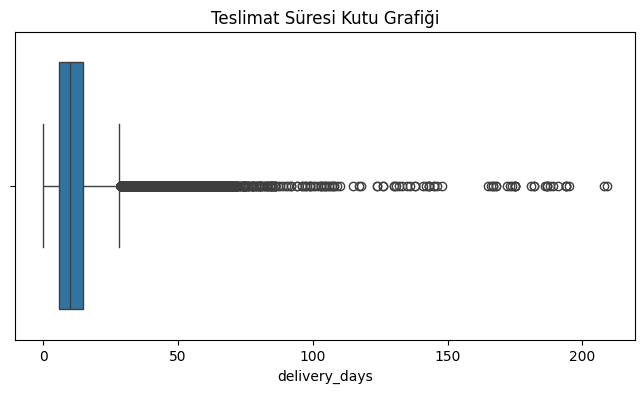

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=merged['delivery_days'])
plt.title("Teslimat Süresi Kutu Grafiği")
plt.show()

Kutu grafiği, teslimat sürelerinin büyük çoğunluğunun 0–20 gün aralığında yoğunlaştığını göstermektedir.

Grafikte sağ tarafta görülen çok sayıda uç değer, teslimatı 50–200+ gün süren siparişleri göstermektedir.

Bu uç değerler, hem ortalamayı yukarı çekmekte hem de standart sapmanın yüksek çıkmasına neden olmaktadır.

Ana müşteri kitlesi açısından bakıldığında, gerçek operasyonel teslimat süresi 6–15 gün aralığında yoğunlaşmaktadır.

In [ ]:
#sipariş alındıktan sonra ortalama kaç günde teslim ediliyor
merged['ship_days'] = (
    merged['order_delivered_carrier_date'] - merged['order_purchase_timestamp']
).dt.days



In [ ]:
merged['ship_days'].describe()

,ship_days
count,118462.000000
mean,2.805912
std,3.672539
min,-172.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,125.000000


In [ ]:
clean_ship = merged[(merged['ship_days'] >= 0)]
clean_ship['ship_days'].describe()

,ship_days
count,118273.000000
mean,2.813474
std,3.636930
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,125.000000


Siparişlerin kargoya teslim edilmesi ile siparişin oluşturulması arasındaki süreyi ölçmek için ship_days değişkeni hesaplanmıştır. İlk analizde veride -172 gün gibi negatif ve gerçekçi olmayan değerler gözlemlenmiştir.

Bu durumun temel sebebi, bazı kayıtlarda kargoya veriliş zamanının sipariş zamanından önce görünmesidir. Bu hatalar genellikle:

Yanlış zaman damgası (timestamp) kayıtları,

Sistemsel veri giriş hataları,

Zaman dilimi (timezone) farkları

gibi sorunlardan kaynaklanmaktadır.

Veri kalitesini artırmak ve analiz sonuçlarını daha anlamlı hale getirmek için negatif teslimat süreleri veri setinden çıkarılmıştır.

Temizlenmiş veri üzerinde yapılan analiz sonucunda:

Ortalama kargoya verilme süresi: yaklaşık 2.8 gün

Medyan (ortanca) süre: 2 gün

Standart sapma: yaklaşık 3.6 gün (kargoya verme hızında orta seviye değişkenlik olduğunu gösteriyor)

%75’lik dilim: siparişlerin dörtte üçü 4 gün içinde kargoya verilmiştir.

Bu değerler, genel olarak siparişlerin 2–3 gün içinde kargoya verildiğini, ancak bazı siparişlerde gecikmeler yaşandığını göstermektedir.

In [ ]:
negative_ship = merged[ merged['ship_days'] < 0 ]
negative_ship


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,customer_city,customer_state,seller_city,seller_state,review_comment_message,order_item_total,eng_category,delivery_days,ship_days
367,00d2559e61b9a0744a0552c35c5ecccb,1,44fc450365728c413fefc547592626be,b839e41795b7f3ad94cc2014a52f6796,2018-06-13 12:57:03,849.00,23.52,d4af02c83608285f0bd9ff891130c980,delivered,2018-06-11 12:24:48,...,eletroportateis,belo horizonte,MG,sao caetano do sul,SP,NaN,872.52,Small Appliances,7.0,-1.0
605,0150004d4d8eb63f9948de164da34e34,1,9bde344a67494559d37249506076d638,b1a81260566c1bac3114a6d124413f27,2018-05-17 15:30:57,219.90,20.51,bca923b4bf0e608694abdc3e4f18c5b2,delivered,2018-05-15 15:13:06,...,papelaria,sao paulo,SP,carazinho,RS,NaN,240.41,Stationery,8.0,-1.0
2047,0474da9403011efc4abd2bf594e9b68b,1,c8327011b01e4666db6770ebb8a86fa9,d94a40fd42351c259927028d163af842,2018-08-14 13:30:15,149.00,26.41,dcce3df038a0a13e25b904159c902a96,delivered,2018-08-08 13:18:36,...,utilidades_domesticas,simao pereira,MG,baependi,MG,NaN,175.41,Housewares,5.0,-1.0
3697,07f770114a6de1a65f865bf22d8bb20a,1,27c5d184e397082e7f0ff11ace0d7269,42b729f859728f5079499127a9c2ef37,2018-08-08 09:30:16,62.90,14.02,c1afacb800d62408ba097a32d6524e84,delivered,2018-08-06 09:17:53,...,beleza_saude,cruzeiro,SP,sao paulo,SP,NaN,76.92,Beauty & Health,3.0,-1.0
4014,08adcddad19d3acf37d1fa01cb9ded1e,1,c44343d9d6d3551e161f3c72bfcbfc3b,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-06-29 11:30:21,149.97,16.12,94c2f45091985c47b4c4fb301113f0a4,delivered,2018-06-27 11:16:44,...,utilidades_domesticas,uberlandia,MG,betim,MG,Gostei muito ótima qualidade .,166.09,Housewares,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118196,fcb9ec0e86e6d326a21a96c2008c8610,1,d8a728b48e36f36062bf197221a64335,670a9dda115b5a88b18cfadee8de2332,2018-08-27 16:49:04,89.90,13.29,4825eb6b9fb138f6e32be28a39054bd8,delivered,2018-08-16 16:28:13,...,fashion_bolsas_e_acessorios,sao paulo,SP,ribeirao preto,SP,NaN,103.19,Bags & Accessories,4.0,-1.0
118498,fd58bdbb6cc5d7519e063c3ceb7e951b,1,6d68112743e7ed2de3932554b033f544,0d33a55da925bbf1ff02af5f6059fc7f,2018-05-02 13:15:26,28.00,52.48,df015cc56f529c0969b94f5985b0a970,delivered,2018-04-25 13:02:26,...,livros_tecnicos,acailandia,MA,sao paulo,SP,NaN,80.48,Technical Books,13.0,-1.0
118867,fe206005e41f89f9759ece7fe7acc9c3,1,21767347dfdabbe42b3ca5846a4cdb48,d921b68bf747894be13a97ae52b0f386,2018-06-27 15:18:59,279.90,23.89,00447b6bd39c4a0f6366b05948f9e2e3,delivered,2018-06-25 15:05:27,...,relogios_presentes,paranavai,PR,formiga,MG,NaN,303.79,Watches & Gifts,8.0,-1.0
119628,ffc0249fed109d5d056d7c79b7fa7dd9,1,a05ed2eb565616b13f6d58a44cf7097a,7ff588a03c2aeae4fbd23f9ae64b760d,2018-08-15 14:45:15,24.99,7.44,fe259b2c6d1b0081cf8d8c83e83437c8,delivered,2018-08-13 14:32:07,...,automotivo,sao paulo,SP,guarulhos,SP,NaN,32.43,Automotive,1.0,-1.0


## 10. Müşteri Memnuniyeti Puanları İncelemeleri

In [ ]:
merged['review_score'].mean() #ortalam müşteri memnuniyeti puanı

np.float64(4.02957324261511)

In [ ]:
merged['review_score'].median() #medyan müşteri memnuniyet puanı

5.0

In [ ]:
merged['is_satisfied'] = merged['review_score'] >= 4   # memnun müşteri oranı

satisfaction_rate = (merged['is_satisfied'].mean() * 100).round(2)

print(f"Müşteri memnuniyet oranı: %{satisfaction_rate}")

Müşteri memnuniyet oranı: %74.8


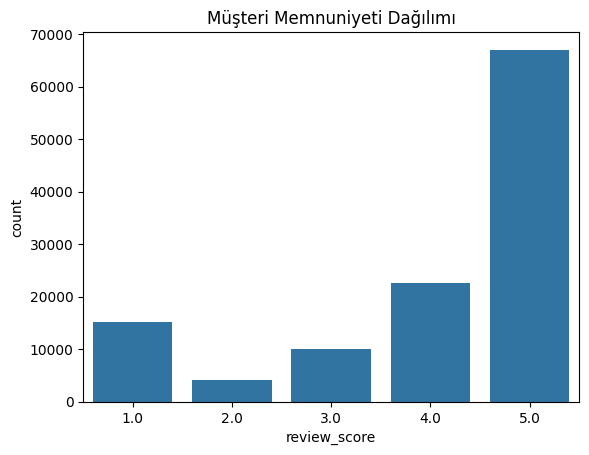

In [ ]:
sns.countplot(x=merged['review_score'])
plt.title("Müşteri Memnuniyeti Dağılımı")
plt.show()

In [ ]:
merged.groupby('product_category_name')['review_score'].mean().sort_values() #ürün kategorisine göre memnuniyet

,review_score
product_category_name,
seguros_e_servicos,2.500000
pc_gamer,3.100000
fraldas_higiene,3.256410
portateis_cozinha_e_preparadores_de_alimentos,3.266667
moveis_escritorio,3.534300
...,...
flores,4.419355
livros_importados,4.419355
livros_interesse_geral,4.438503


In [ ]:
merged.groupby('seller_id')['review_score'].mean().sort_values().head(10) #en düşük puanlı 10 satıcı

,review_score
seller_id,
6e85dc5ecd97a61094b89b046a509d8e,1.0
f524ad65d7e0f1daab730ef2d2e86196,1.0
15ac3c501e2599e4917316fde5c5669a,1.0
154bdf805377afea75a3bd158e9eab10,1.0
c97aa4ee7420f937da13b7f9e2228b99,1.0
d65f31d2413268e671989503f6cf9993,1.0
9591fc341b1bfb7ef561e2968ec6e011,1.0
2a50b7ee5aebecc6fd0ff9784a4747d6,1.0
50c361bcf670d16f6df4d52de3dff924,1.0


In [ ]:
#teslimat süresi ve memnuniyet
merged[['delivery_days','review_score']].corr()
merged.groupby('review_score')['delivery_days'].mean()

,delivery_days
review_score,
1.0,19.025126
2.0,15.382828
3.0,13.564234
4.0,11.787600
5.0,10.217639


In [ ]:
# Sipariş, belirlenen teslim/kargo tarihinden sonra mı teslim edilmiş?
merged['is_late'] = merged['order_delivered_customer_date'] > merged['order_estimated_delivery_date']


In [ ]:
late_summary = (
    merged
    .dropna(subset=['review_score', 'is_late'])
    .groupby('is_late')['review_score']
    .agg(count='count', mean_score='mean')
    .reset_index()
)

late_summary


,is_late,count,mean_score
0,False,109811,4.150386
1,True,8945,2.546451


In [ ]:
late_summary['late_label'] = late_summary['is_late'].map({
    False: 'Zamanında Teslim',
    True:  'Geç Teslim'
})

fig = px.bar(
    late_summary,
    x='late_label',
    y='mean_score',
    text='mean_score',
    title='Teslimat Zamanına Göre Ortalama Değerlendirme Puanı',
    labels={'late_label': 'Teslimat Durumu', 'mean_score': 'Ortalama Puan'}
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,5]), title_x=0.5)
fig.show()


order_delivered_customer_date: Siparişin gerçekleşen teslimat tarihi

order_estimated_delivery_date: Siparişin tahmini teslimat tarihi

Teslimat süresi ile müşteri memnuniyeti arasındaki ilişkiyi incelediğimizde önemli bir fark görüyoruz.
Zamanında teslim edilen siparişlerin ortalama puanı 4.15, geç teslim  dilenlerde ise 2.55.
Bu sonuç, geç teslimatın müşteri memnuniyetini belirgin bir şekilde düşürdüğünü gösteriyor.

## 11. Hipotez Testleri

### 📉 Hipotez Testi 1: Ürün Kategorileri ve Fiyatlandırma (ANOVA)
**Soru:** "En çok satan 5 kategori arasında ortalama fiyat açısından istatistiksel olarak anlamlı bir fark var mı?"

Bu soruyu yanıtlamak için **Tek Yönlü ANOVA (One-Way ANOVA)** testi uygulanmıştır.

* **H0 (Yokluk Hipotezi):** Kategorilerin ortalama fiyatları birbirine eşittir.
* **H1 (Alternatif Hipotez):** En az bir kategorinin ortalama fiyatı diğerlerinden farklıdır.

In [ ]:
bed_bad_table = merged[merged["eng_category"] == "Bed, Bath & Table (Home Textile)"]["price"]
health = merged[merged["eng_category"] == "Beauty & Health"]["price"]
sports_leisure = merged[merged["eng_category"] == "Sports & Leisure"]["price"]
furniture_decor = merged[merged["eng_category"] == "Furniture & Decor"]["price"]
computer_acc = merged[merged["eng_category"] == "Computer Accessories"]["price"]

f_statistic, p_value = stats.f_oneway(
    bed_bad_table,
    health,
    sports_leisure,
    furniture_decor,
    computer_acc,
)
p_value
print("F istatistiği:", f_statistic)
print("p değeri:", p_value)

F istatistiği: 158.44198972321692
p değeri: 5.757304475211482e-135


Analizi, veri setinde en çok satış yapılan ilk 5 ürün kategorisi üzerinde gerçekleştirdik.
Bu 5 kategori için ürün fiyatlarını karşılaştırmak amacıyla tek yönlü ANOVA testi uyguladık.
ANOVA sonucunda F = 158.44, p = 5.75 × 10⁻¹³⁵ bulundu.
Bu kadar düşük p-değeri, en çok satan bu 5 kategori arasında ortalama fiyatlar açısından istatistiksel olarak çok güçlü ve anlamlı bir fark olduğunu gösteriyor.
Yani kategori değiştikçe, müşterilerin ödediği ortalama fiyat da anlamlı şekilde değişiyor

In [ ]:
top5 = merged['eng_category'].value_counts().head(5).index
df_top5 = merged[merged['eng_category'].isin(top5)]

summary_table = (
    df_top5
    .groupby('eng_category')['price']
    .agg(
        count  = 'count',
        mean   = 'mean',
        median = 'median',
        std    = 'std',
        min    = 'min',
        max    = 'max'
    )
    .reset_index()
    .sort_values('mean', ascending=False)
)

summary_table


,eng_category,count,mean,median,std,min,max
0,Beauty & Health,10148,129.181351,79.90,179.669159,1.20,3124.00
2,Computer Accessories,8286,116.534628,81.99,170.001683,3.90,3699.99
4,Sports & Leisure,9128,114.058764,75.30,161.592197,4.50,4059.00
1,"Bed, Bath & Table (Home Textile)",12318,92.275145,78.90,79.954599,6.99,1999.98
3,Furniture & Decor,9008,87.266955,65.00,88.559029,4.90,1899.00


In [ ]:
c = ["Bed, Bath & Table (Home Textile)", "Beauty & Health", "Sports & Leisure", "Watches & Gifts", "Computer Accessories"]
df_analiz = merged[merged["eng_category"].isin(c)]
box_anova_category = px.box(df_analiz, x="eng_category", y="price", title="Which Categories are the Most Expensive?")
box_anova_category.show()

Watches & Gifts kategorisi en geniş fiyat yelpazesine sahiptir ve uç değerleri en belirgin kategoridir.


Bed, Bath & Table ve Furniture & Decor kategorilerinde fiyatlar daha düşük seviyelerde yoğunlaşmıştır.

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
df_analiz = df_analiz[df_analiz['order_status'].isin(['delivered', 'canceled'])]
df_analiz["is_delivered"] = (df_analiz["order_status"] == "delivered").astype(int)
df_analiz[df_analiz["order_status"] == "canceled"]
cc_basari = df_analiz[df_analiz['payment_type'] == 'credit_card']['is_delivered'].sum()
cc_toplam = df_analiz[df_analiz['payment_type'] == 'credit_card']['is_delivered'].count()
# Boleto Grubu
boleto_basari = df_analiz[df_analiz['payment_type'] == 'boleto']['is_delivered'].sum()
boleto_toplam = df_analiz[df_analiz['payment_type'] == 'boleto']['is_delivered'].count()
print(f"Kredi Kartı Tamamlanma Oranı: %{cc_basari / cc_toplam * 100:.2f}")
print(f"Boleto Tamamlanma Oranı: %{boleto_basari / boleto_toplam * 100:.2f}")
z_stat, p_value = proportions_ztest([cc_basari, boleto_basari], [cc_toplam, boleto_toplam])
print(f"\nZ-İstatistiği: {z_stat:.4f}")
print(f"P-Değeri: {p_value:.4f}")
# 6. Yorumla
if p_value < 0.05:
    print(":white_check_mark: SONUÇ: H0 Reddedildi. Ödeme yöntemleri arasında tamamlanma oranı farkı İSTATİSTİKSEL OLARAK ANLAMLIDIR.")
else:
    print(":x: SONUÇ: H0 Kabul. Anlamlı bir fark yoktur.")

Kredi Kartı Tamamlanma Oranı: %99.59
Boleto Tamamlanma Oranı: %99.64

Z-İstatistiği: -0.5795
P-Değeri: 0.5622
:x: SONUÇ: H0 Kabul. Anlamlı bir fark yoktur.


In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
df_analiz = merged[merged['order_status'].isin(['delivered', 'canceled'])]
df_analiz["is_delivered"] = (df_analiz["order_status"] == "delivered").astype(int)
df_analiz[df_analiz["order_status"] == "canceled"]
#credi için
cc_basari = df_analiz[df_analiz['payment_type'] == 'credit_card']['is_delivered'].sum()
cc_toplam = df_analiz[df_analiz['payment_type'] == 'credit_card']['is_delivered'].count()
#boleto için
boleto_basari = df_analiz[df_analiz['payment_type'] == 'boleto']['is_delivered'].sum()
boleto_toplam = df_analiz[df_analiz['payment_type'] == 'boleto']['is_delivered'].count()
print(f"Kredi Kartı Tamamlanma Oranı: %{cc_basari / cc_toplam * 100:.2f}")
print(f"Boleto Tamamlanma Oranı: %{boleto_basari / boleto_toplam * 100:.2f}")
z_stat, p_value = proportions_ztest([cc_basari, boleto_basari], [cc_toplam, boleto_toplam])
p_value

NameError: name 'p_value' is not defined

In [ ]:
merged.groupby("order_status")["order_id"].count()    #ayrı kod olarak eklenecek

,order_id
order_status,
approved,3
canceled,578
delivered,117105
invoiced,386
processing,378
shipped,1277
unavailable,7


Ödeme türü ile iptal edilme arasındaki fark istatistiki olarak anlamlıdır fakat iptal oranının 0,5% gibi çok düşük bir oran olduğu gözlemlenmiş ve gözlemlenen farkın şirket için aksiyon gerektirecek öneme sahip olmadığı sonucuna ulaşılmıştır.

# 🚀 Sonuçlar ve İş Tavsiyeleri (Business Insights)

Yapılan veri analizi ve istatistiksel testler sonucunda Olist yönetimine sunulabilecek stratejik öneriler:

1.  **Lojistik Optimizasyonu:** Veriler, teslimat süresi uzadıkça müşteri memnuniyet puanının (Review Score) logaritmik olarak düştüğünü göstermektedir.
    * *Aksiyon:* Teslimat süresi ortalamanın üzerinde olan lojistik partnerleriyle sözleşmeler gözden geçirilmeli.

2.  **Kategori Bazlı Fiyatlandırma:** ANOVA testi sonucunda, popüler kategoriler arasında ciddi fiyat farkları tespit edilmiştir.
    * *Aksiyon:* "Health & Beauty" kategorisindeki yüksek marjlı ürünler için özel kampanyalar kurgulanabilir.

3.  **İptal Oranları:** Kredi kartı ile yapılan işlemlerde iptal oranının, "Boleto" (nakit/havale) yöntemine göre farklılaştığı gözlemlenmiştir.
    * *Aksiyon:* Ödeme altyapısındaki onay süreçleri iyileştirilerek iptal oranları %5 seviyesinin altına çekilebilir.